In [1]:
import pandas as pd

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split 
from sklearn import metrics 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

import xgboost as xgb
from xgboost import XGBClassifier

import torch
from transformers import BertTokenizer, BertForSequenceClassification
from transformers import Trainer, TrainingArguments
from datasets import Dataset

from sklearn.naive_bayes import MultinomialNB

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np




In [22]:
df = pd.read_csv("df_new.csv")
df1 = pd.read_csv("df_bezLiT.csv")
df2 = pd.read_csv("df_manjiTC.csv")
df3 = pd.read_csv("df_veciTC.csv")
df4 = pd.read_csv("df_FullLem.csv")

In [33]:
feature_cols = [
    'Word count', 'Max word length', 'Min word length',
       'Average word length', 'Present verbs', 'Past verbs', 'Adjectives',
       'Adverbs', 'Pronouns', 'Conjunctions', 'Determiners', 'Prepositions',
       'Digits'
]
feature_cols1 = [
    'Word count',
       'Max word length', 'Min word length', 'Average word length',
       'Present verbs', 'Past verbs', 'Adjectives', 'Adverbs', 'Pronouns',
       'Conjunctions', 'Determiners', 'Prepositions', 'Digits'
]
feature_cols2 = [
    'Word count',
       'Max word length', 'Min word length', 'Average word length',
       'Present verbs', 'Past verbs', 'Adjectives', 'Adverbs', 'Pronouns',
       'Conjunctions', 'Determiners', 'Prepositions', 'Digits', 'Dots',
       'Exclamations', 'Questions', 'Ampersands'
]
feature_cols3 = [
    'Word count', 'Max word length', 'Min word length',
       'Average word length', 'Present verbs', 'Past verbs', 'Adjectives',
       'Adverbs', 'Pronouns', 'Conjunctions', 'Determiners', 'Prepositions'
]
feature_cols4 = [
     'Word count', 'Max word length', 'Min word length',
       'Average word length', 'Present verbs', 'Past verbs', 'Adjectives',
       'Adverbs', 'Pronouns', 'Conjunctions', 'Determiners', 'Prepositions'
]


In [36]:
df['BinaryNumTarget'] = df['majority_target'].astype(int)
x = df[feature_cols]
y = df['BinaryNumTarget']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1) 

x1 = df1[feature_cols1]
y1 = df1['BinaryNumTarget']

x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.2, random_state=1) 

x2 = df2[feature_cols2]
y2 = df2['BinaryNumTarget']

x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size=0.2, random_state=1) 

x3 = df3[feature_cols3]
y3 = df3['BinaryNumTarget']

x3_train, x3_test, y3_train, y3_test = train_test_split(x3, y3, test_size=0.2, random_state=1)

x4 = df4[feature_cols4]
y4 = df4['BinaryNumTarget']

x4_train, x4_test, y4_train, y4_test = train_test_split(x4, y4, test_size=0.2, random_state=1)  

# Originalna ideja preprocesiranja

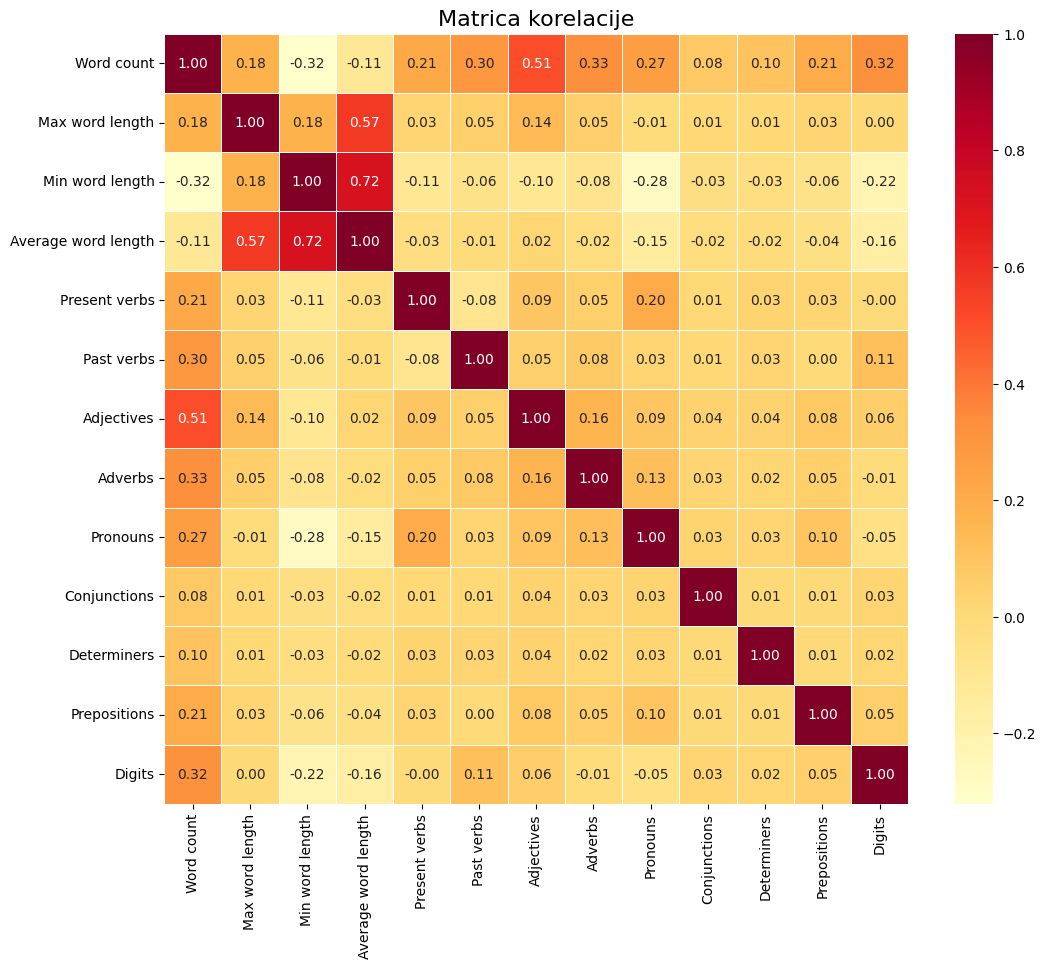

In [24]:
correlation_matrix = df[feature_cols].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='YlOrRd', fmt=".2f", linewidths=.5)
plt.title('Matrica korelacije', fontsize=16)
plt.show()

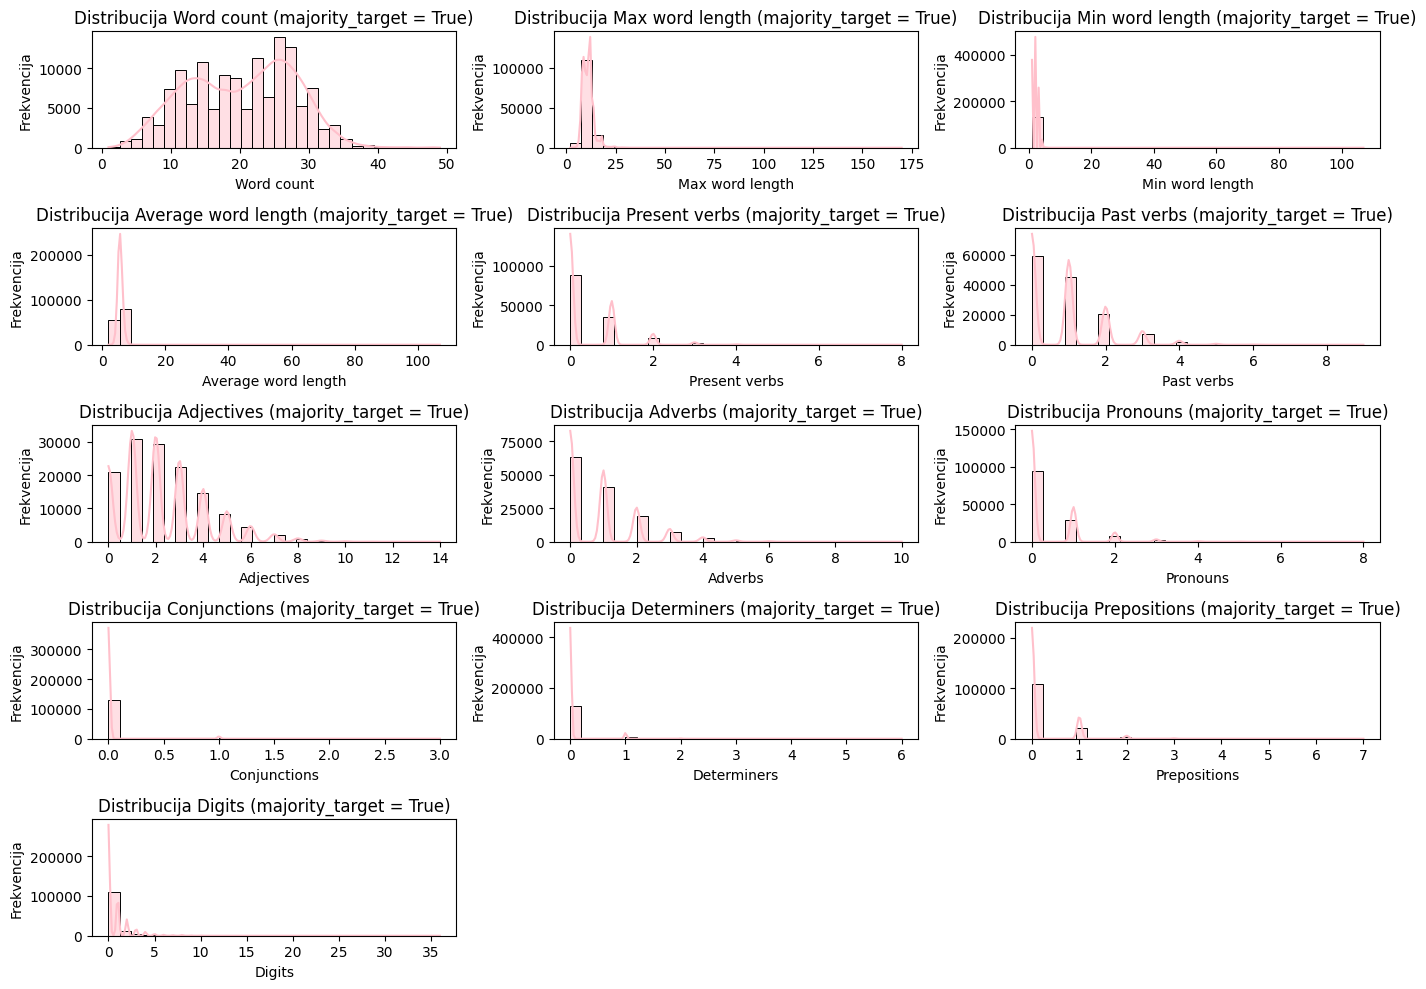

In [25]:
plt.figure(figsize=(14, 10))

for i, col in enumerate(feature_cols, 1):
    plt.subplot(5, 3, i)
    sns.histplot(df[col], bins=30, kde=True, color='pink')
    plt.title(f"Distribucija {col} (majority_target = True)")
    plt.xlabel(col)
    plt.ylabel("Frekvencija")



plt.tight_layout()  
plt.show()

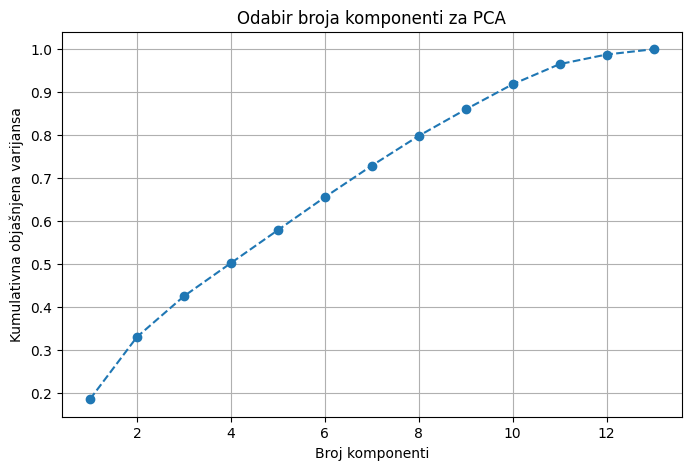

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

X = df[['Word count', 'Max word length', 'Min word length', 'Average word length', 
        'Present verbs', 'Past verbs', 'Adjectives', 'Adverbs', 
        'Pronouns', 'Conjunctions', 'Determiners', 'Prepositions', 'Digits']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA()
X_pca = pca.fit_transform(X_scaled)

explained_variance = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(8,5))
plt.plot(range(1, len(explained_variance)+1), explained_variance, marker='o', linestyle='--')
plt.xlabel("Broj komponenti")

plt.grid()
plt.show()


In [40]:
pca = PCA(n_components=8)
X_pca = pca.fit_transform(X)

In [47]:

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1) 

In [86]:
# Random Forest

rf = RandomForestClassifier()
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)


print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("F1:", metrics.f1_score(y_test, y_pred))

print(classification_report(y_test, y_pred))

Accuracy: 0.6155967062856291
Precision: 0.6309349355216881
Recall: 0.6198977755381182
F1: 0.6253676604088747
              precision    recall  f1-score   support

           0       0.60      0.61      0.61     12948
           1       0.63      0.62      0.63     13891

    accuracy                           0.62     26839
   macro avg       0.62      0.62      0.62     26839
weighted avg       0.62      0.62      0.62     26839



In [ ]:
#Random Baseline Model

random_predictions = np.random.randint(0, 2, size=len(y_test)) 

print("Accuracy:", metrics.accuracy_score(y_test, random_predictions))
print("Precision:", metrics.precision_score(y_test, random_predictions, zero_division=1))
print("Recall:", metrics.recall_score(y_test, random_predictions, zero_division=1))

print(classification_report(y_test, random_predictions))

Accuracy: 0.503409217929133
Precision: 0.52095897550443
Recall: 0.5037074364696567
              precision    recall  f1-score   support

           0       0.49      0.50      0.49     12948
           1       0.52      0.50      0.51     13891

    accuracy                           0.50     26839
   macro avg       0.50      0.50      0.50     26839
weighted avg       0.50      0.50      0.50     26839



In [50]:
# Decision Tree


clf = DecisionTreeClassifier()
clf = clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("F1:", metrics.f1_score(y_test, y_pred))

print(classification_report(y_test, y_pred))

Accuracy: 0.5753194977458177
Precision: 0.5922172079603463
Recall: 0.5762724065941977
F1: 0.5841360186806772
              precision    recall  f1-score   support

           0       0.56      0.57      0.57     12948
           1       0.59      0.58      0.58     13891

    accuracy                           0.58     26839
   macro avg       0.58      0.58      0.58     26839
weighted avg       0.58      0.58      0.58     26839



In [51]:
# KNN


knn = KNeighborsClassifier(n_neighbors=5)  

knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("F1:", metrics.f1_score(y_test, y_pred))

print(classification_report(y_test, y_pred))

Accuracy: 0.5873542233317187
Precision: 0.602803738317757
Recall: 0.5943416600676698
F1: 0.598542791894733
              precision    recall  f1-score   support

           0       0.57      0.58      0.58     12948
           1       0.60      0.59      0.60     13891

    accuracy                           0.59     26839
   macro avg       0.59      0.59      0.59     26839
weighted avg       0.59      0.59      0.59     26839



In [52]:
# Logistic Regression

lr = LogisticRegression(max_iter=1000)  
lr.fit(x_train, y_train)

y_pred = lr.predict(x_test)

print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))
print("F1:", metrics.f1_score(y_test, y_pred))

print(classification_report(y_test, y_pred))

Accuracy: 0.5711092067513692
Precision: 0.5776255707762558
Recall: 0.6374631056079476
F1: 0.6060709763526231
              precision    recall  f1-score   support

           0       0.56      0.50      0.53     12948
           1       0.58      0.64      0.61     13891

    accuracy                           0.57     26839
   macro avg       0.57      0.57      0.57     26839
weighted avg       0.57      0.57      0.57     26839



In [53]:
#Naive Bayes

nb = MultinomialNB()
nb.fit(x_train, y_train)

y_pred = nb.predict(x_test)

print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))
print("F1:", metrics.f1_score(y_test, y_pred))


print(classification_report(y_test, y_pred))


Accuracy: 0.5702522448675434
Precision: 0.5874972158289405
Recall: 0.5696494132891801
F1: 0.5784356725146199
              precision    recall  f1-score   support

           0       0.55      0.57      0.56     12948
           1       0.59      0.57      0.58     13891

    accuracy                           0.57     26839
   macro avg       0.57      0.57      0.57     26839
weighted avg       0.57      0.57      0.57     26839



In [54]:
#XGBoost

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')  
xgb.fit(x_train, y_train)

y_pred = xgb.predict(x_test)

print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))
print("F1:", metrics.f1_score(y_test, y_pred))

print(classification_report(y_test, y_pred))

C:\Users\Sara\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\training.py:183: UserWarning: [18:44:07] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Accuracy: 0.6192108498826335
Precision: 0.6361343914559074
Recall: 0.6174501475775682
F1: 0.6266530284211296
              precision    recall  f1-score   support

           0       0.60      0.62      0.61     12948
           1       0.64      0.62      0.63     13891

    accuracy                           0.62     26839
   macro avg       0.62      0.62      0.62     26839
weighted avg       0.62      0.62      0.62     26839



In [55]:
# SVM

svm_clf = SVC(kernel='linear')  
svm_clf.fit(x_train, y_train)  

y_pred = svm_clf.predict(x_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))
print("F1:", metrics.f1_score(y_test, y_pred))

print(classification_report(y_test, y_pred))


Accuracy: 0.569581579045419
Precision: 0.5720179814027957
Recall: 0.6687063566337916
F1: 0.6165947560570859
              precision    recall  f1-score   support

           0       0.57      0.46      0.51     12948
           1       0.57      0.67      0.62     13891

    accuracy                           0.57     26839
   macro avg       0.57      0.57      0.56     26839
weighted avg       0.57      0.57      0.56     26839



# Bez lematizacije preprocesiranje

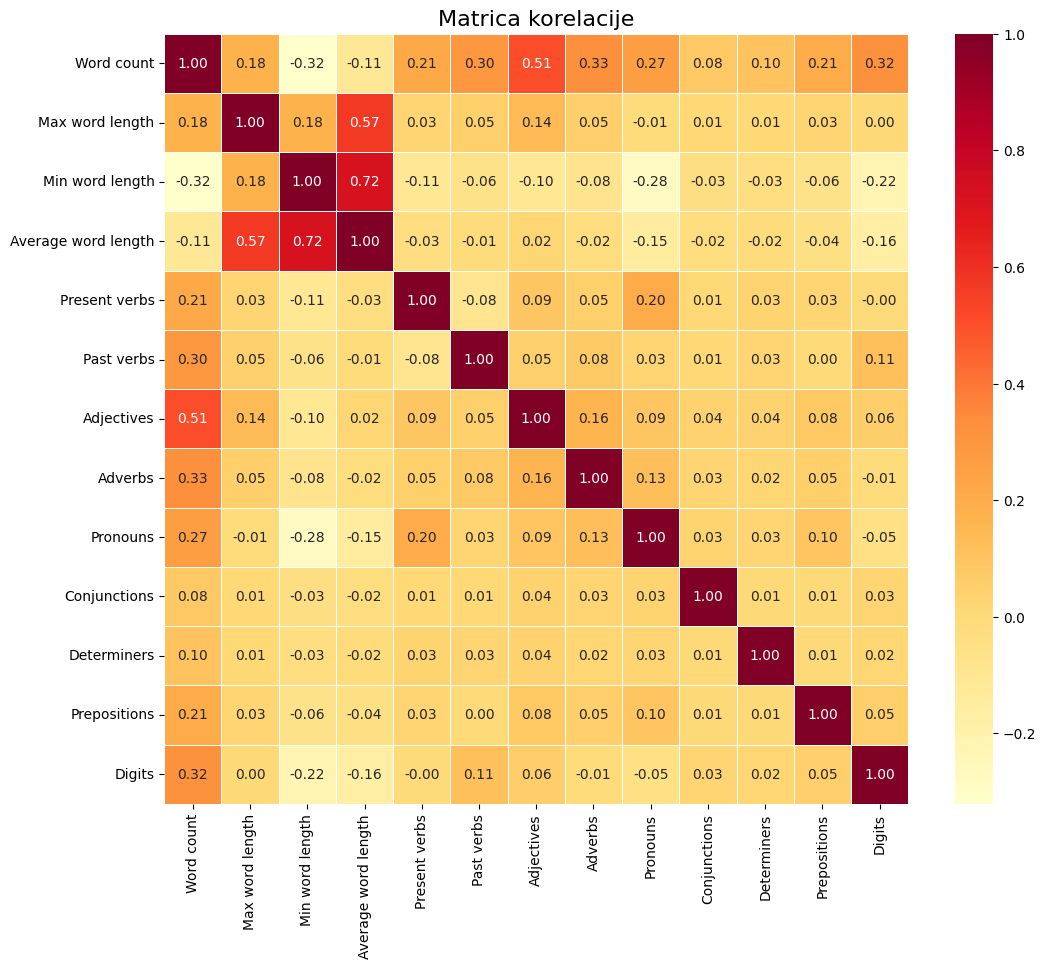

In [56]:
correlation_matrix = df[feature_cols1].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='YlOrRd', fmt=".2f", linewidths=.5)
plt.title('Matrica korelacije', fontsize=16)
plt.show()

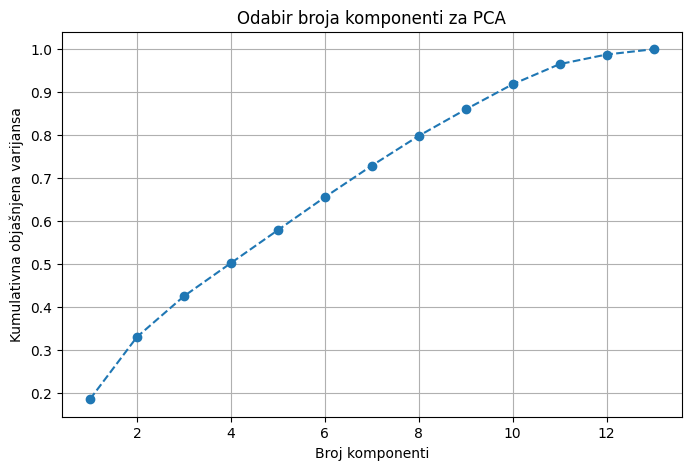

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

X = df[feature_cols1]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA()
X_pca = pca.fit_transform(X_scaled)

explained_variance = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(8,5))
plt.plot(range(1, len(explained_variance)+1), explained_variance, marker='o', linestyle='--')
plt.xlabel("Broj komponenti")

plt.grid()
plt.show()


In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

x1 = df1[feature_cols1]
y1 = df1['BinaryNumTarget']

x1_train, x1_temp, y1_train, y1_temp = train_test_split(x1, y1, test_size=0.2, random_state=1)

x1_val, x1_test, y1_val, y1_test = train_test_split(x1_temp, y1_temp, test_size=0.5, random_state=1)

xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')

param_grid = {
    'n_estimators': [50, 100, 200],  
    'max_depth': [3, 5, 7],  
    'learning_rate': [0.01, 0.1, 0.3],  
}

grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='roc_auc', cv=3)
grid_search.fit(x1_train, y1_train)

best_xgb_model = grid_search.best_estimator_

y1_val_pred = best_xgb_model.predict(x1_val)
print("Validation Accuracy:", accuracy_score(y1_val, y1_val_pred))
print("Validation Precision:", precision_score(y1_val, y1_val_pred))
print("Validation Recall:", recall_score(y1_val, y1_val_pred))
print("Validation F1: ", f1_score(y1_val, y1_val_pred))
print(classification_report(y1_val, y1_val_pred))

y1_test_pred = best_xgb_model.predict(x1_test)
print("Test Accuracy:", accuracy_score(y1_test, y1_test_pred))
print("Test Precision:", precision_score(y1_test, y1_test_pred))
print("Test Recall:", recall_score(y1_test, y1_test_pred))
print("Test F1: ", f1_score(y1_test, y1_test_pred))


C:\Users\Sara\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\training.py:183: UserWarning: [22:22:05] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\Sara\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\training.py:183: UserWarning: [22:22:05] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\Sara\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\training.py:183: UserWarning: [22:22:06] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are

Validation Accuracy: 0.632684998882182
Validation Precision: 0.6518958428506167
Validation Recall: 0.6182842287694974
Validation F1:  0.6346453191016233
              precision    recall  f1-score   support

         0.0       0.61      0.65      0.63      6495
         1.0       0.65      0.62      0.63      6924

    accuracy                           0.63     13419
   macro avg       0.63      0.63      0.63     13419
weighted avg       0.63      0.63      0.63     13419

Test Accuracy: 0.630849478390462
Test Precision: 0.6492051476154429
Test Recall: 0.6192057761732852
Test F1:  0.6338507021433851
Test AUC-ROC Score: 0.6923579760048691


In [12]:
# Random Forest
rf = RandomForestClassifier()
rf.fit(x1_train, y1_train)
y1_pred = rf.predict(x1_test)


print("Accuracy:",metrics.accuracy_score(y1_test, y1_pred))
print("Precision:",metrics.precision_score(y1_test, y1_pred))
print("Recall:",metrics.recall_score(y1_test, y1_pred))
print("F1: ", metrics.f1_score(y1_test,y1_pred))

print(classification_report(y1_test, y1_pred))

Accuracy: 0.6358284585863855
Precision: 0.6510042244126584
Recall: 0.6342696223554047
F1:  0.6425279789335089
              precision    recall  f1-score   support

         0.0       0.62      0.64      0.63     12990
         1.0       0.65      0.63      0.64     13849

    accuracy                           0.64     26839
   macro avg       0.64      0.64      0.64     26839
weighted avg       0.64      0.64      0.64     26839



In [13]:
# Bez lematizacije
rf = RandomForestClassifier()
rf.fit(x1_train, y1_train)
y1_pred = rf.predict(x1_train)


print("Accuracy:",metrics.accuracy_score(y1_train, y1_pred))
print("Precision:",metrics.precision_score(y1_train, y1_pred))
print("Recall:",metrics.recall_score(y1_train, y1_pred))
print("F1: ", metrics.f1_score(y1_train,y1_pred))

print(classification_report(y1_train, y1_pred))

Accuracy: 0.9933119713849249
Precision: 0.9935537760345735
Recall: 0.9934094664028033
F1:  0.9934816159782115
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99     52277
         1.0       0.99      0.99      0.99     55079

    accuracy                           0.99    107356
   macro avg       0.99      0.99      0.99    107356
weighted avg       0.99      0.99      0.99    107356



In [ ]:
#Random Baseline Model

random_predictions = np.random.randint(0, 2, size=len(y1_test)) 

print("Accuracy:", metrics.accuracy_score(y1_test, random_predictions))
print("Precision:", metrics.precision_score(y1_test, random_predictions, zero_division=1))
print("Recall:", metrics.recall_score(y1_test, random_predictions, zero_division=1))

print(classification_report(y1_test, random_predictions))

Accuracy: 0.5033719587167927
Precision: 0.519296422740092
Recall: 0.5052350350205791
              precision    recall  f1-score   support

         0.0       0.49      0.50      0.49     12990
         1.0       0.52      0.51      0.51     13849

    accuracy                           0.50     26839
   macro avg       0.50      0.50      0.50     26839
weighted avg       0.50      0.50      0.50     26839



In [59]:
# Decision Tree


clf = DecisionTreeClassifier()
clf = clf.fit(x1_train,y1_train)
y1_pred = clf.predict(x1_test)

print("Accuracy:",metrics.accuracy_score(y1_test, y1_pred))
print("Precision:",metrics.precision_score(y1_test, y1_pred))
print("Recall:",metrics.recall_score(y1_test, y1_pred))
print("F1:", metrics.f1_score(y1_test, y1_pred))

print(classification_report(y1_test, y1_pred))

Accuracy: 0.589179924736391
Precision: 0.6032024566790963
Recall: 0.5957108816521048
F1: 0.5994332630967085
              precision    recall  f1-score   support

         0.0       0.57      0.58      0.58     12990
         1.0       0.60      0.60      0.60     13849

    accuracy                           0.59     26839
   macro avg       0.59      0.59      0.59     26839
weighted avg       0.59      0.59      0.59     26839



In [60]:
# KNN


knn = KNeighborsClassifier(n_neighbors=5)  

knn.fit(x1_train, y1_train)
y1_pred = knn.predict(x1_test)

print("Accuracy:",metrics.accuracy_score(y1_test, y1_pred))
print("Precision:",metrics.precision_score(y1_test, y1_pred))
print("Recall:",metrics.recall_score(y1_test, y1_pred))
print("F1:", metrics.f1_score(y1_test, y1_pred))

print(classification_report(y1_test, y1_pred))

Accuracy: 0.601028354260591
Precision: 0.6150296638101516
Recall: 0.6063253664524514
F1: 0.6106464984364773
              precision    recall  f1-score   support

         0.0       0.59      0.60      0.59     12990
         1.0       0.62      0.61      0.61     13849

    accuracy                           0.60     26839
   macro avg       0.60      0.60      0.60     26839
weighted avg       0.60      0.60      0.60     26839



In [91]:
# SVM

svm_clf = SVC(kernel='linear')  
svm_clf.fit(x1_train, y1_train)  

y1_pred = svm_clf.predict(x1_test)

print("Accuracy:", accuracy_score(y1_test, y1_pred))
print("Precision:", metrics.precision_score(y1_test, y1_pred))
print("Recall:", metrics.recall_score(y1_test, y1_pred))
print("F1:", metrics.f1_score(y1_test, y1_pred))

print(classification_report(y1_test, y1_pred))


Accuracy: 0.5780766794589962
Precision: 0.5787536647744994
Recall: 0.6699400678749369
F1: 0.6210174029451138
              precision    recall  f1-score   support

         0.0       0.58      0.48      0.52     12990
         1.0       0.58      0.67      0.62     13849

    accuracy                           0.58     26839
   macro avg       0.58      0.58      0.57     26839
weighted avg       0.58      0.58      0.57     26839



In [ ]:
# TF IDF

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df1['tweet_new'])  
y = df1['BinaryNumTarget'].astype(int)  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "Decision Tree": DecisionTreeClassifier(),
    "Naive Bayes": MultinomialNB()
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = metrics.precision_score(y_test, y_pred)
    rec = metrics.recall_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred)

    results[name] = (acc, prec, rec, f1)
    print(f"{name}: Accuracy={acc:.4f}, Precision={prec:.4f}, Recall={rec:.4f}, F1={f1:.4f}")


Random Forest: Accuracy=0.9805, Precision=0.9822, Recall=0.9797, F1=0.9810
Decision Tree: Accuracy=0.9705, Precision=0.9697, Recall=0.9730, F1=0.9713
Naive Bayes: Accuracy=0.9463, Precision=0.9383, Recall=0.9585, F1=0.9483


In [61]:
# Logistic Regression

lr = LogisticRegression(max_iter=1000)  
lr.fit(x1_train, y1_train)

y1_pred = lr.predict(x1_test)

print("Accuracy:", metrics.accuracy_score(y1_test, y1_pred))
print("Precision:", metrics.precision_score(y1_test, y1_pred))
print("Recall:", metrics.recall_score(y1_test, y1_pred))
print("F1:", metrics.f1_score(y1_test, y1_pred))

print(classification_report(y1_test, y1_pred))

Accuracy: 0.578039420246656
Precision: 0.58364262990456
Recall: 0.635858184706477
F1: 0.6086325465666793
              precision    recall  f1-score   support

         0.0       0.57      0.52      0.54     12990
         1.0       0.58      0.64      0.61     13849

    accuracy                           0.58     26839
   macro avg       0.58      0.58      0.58     26839
weighted avg       0.58      0.58      0.58     26839



In [62]:
#Naive Bayes

nb = MultinomialNB()
nb.fit(x1_train, y1_train)

y1_pred = nb.predict(x1_test)

print("Accuracy:", metrics.accuracy_score(y1_test, y1_pred))
print("Precision:", metrics.precision_score(y1_test, y1_pred))
print("Recall:", metrics.recall_score(y1_test, y1_pred))
print("F1:", metrics.f1_score(y1_test, y1_pred))


print(classification_report(y1_test, y1_pred))


Accuracy: 0.576400014903685
Precision: 0.5916888494528246
Recall: 0.5778034515127446
F1: 0.5846637197238155
              precision    recall  f1-score   support

         0.0       0.56      0.57      0.57     12990
         1.0       0.59      0.58      0.58     13849

    accuracy                           0.58     26839
   macro avg       0.58      0.58      0.58     26839
weighted avg       0.58      0.58      0.58     26839



In [63]:
#XGBoost

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')  
xgb.fit(x1_train, y1_train)

y1_pred = xgb.predict(x1_test)

print("Accuracy:", metrics.accuracy_score(y1_test, y1_pred))
print("Precision:", metrics.precision_score(y1_test, y1_pred))
print("Recall:", metrics.recall_score(y1_test, y1_pred))
print("F1:", metrics.f1_score(y1_test, y1_pred))

print(classification_report(y1_test, y1_pred))

C:\Users\Sara\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\training.py:183: UserWarning: [19:20:00] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Accuracy: 0.6275569134468497
Precision: 0.6433727766614572
Recall: 0.6242327965918116
F1: 0.633658286300667
              precision    recall  f1-score   support

         0.0       0.61      0.63      0.62     12990
         1.0       0.64      0.62      0.63     13849

    accuracy                           0.63     26839
   macro avg       0.63      0.63      0.63     26839
weighted avg       0.63      0.63      0.63     26839



# Smanjen Text Cleaning

In [87]:
# Random Forest


rf = RandomForestClassifier()
rf.fit(x2_train, y2_train)
y2_pred = rf.predict(x2_test)


print("Accuracy:",metrics.accuracy_score(y2_test, y2_pred))
print("Precision:",metrics.precision_score(y2_test, y2_pred))
print("Recall:",metrics.recall_score(y2_test, y2_pred))
print("F1:", metrics.f1_score(y2_test,y2_pred))

print(classification_report(y2_test, y2_pred))

Accuracy: 0.6250745156482861
Precision: 0.6389213680210465
Recall: 0.630580598629643
F1: 0.6347235834331555
              precision    recall  f1-score   support

         0.0       0.61      0.62      0.61     12975
         1.0       0.64      0.63      0.63     13865

    accuracy                           0.63     26840
   macro avg       0.62      0.62      0.62     26840
weighted avg       0.63      0.63      0.63     26840



In [64]:
# Decision Tree


clf = DecisionTreeClassifier()
clf = clf.fit(x2_train,y2_train)
y2_pred = clf.predict(x2_test)

print("Accuracy:",metrics.accuracy_score(y2_test, y2_pred))
print("Precision:",metrics.precision_score(y2_test, y2_pred))
print("Recall:",metrics.recall_score(y2_test, y2_pred))
print("F1:", metrics.f1_score(y2_test, y2_pred))

print(classification_report(y2_test, y2_pred))

Accuracy: 0.5836810730253353
Precision: 0.59738003908229
Recall: 0.595311936530833
F1: 0.5963441947836139
              precision    recall  f1-score   support

         0.0       0.57      0.57      0.57     12975
         1.0       0.60      0.60      0.60     13865

    accuracy                           0.58     26840
   macro avg       0.58      0.58      0.58     26840
weighted avg       0.58      0.58      0.58     26840



In [65]:
# KNN


knn = KNeighborsClassifier(n_neighbors=5)  

knn.fit(x2_train, y2_train)
y2_pred = knn.predict(x2_test)

print("Accuracy:",metrics.accuracy_score(y2_test, y2_pred))
print("Precision:",metrics.precision_score(y2_test, y2_pred))
print("Recall:",metrics.recall_score(y2_test, y2_pred))
print("F1:", metrics.f1_score(y2_test, y2_pred))

print(classification_report(y2_test, y2_pred))

Accuracy: 0.5881147540983607
Precision: 0.600933908045977
Recall: 0.6033177064551027
F1: 0.6021234479035451
              precision    recall  f1-score   support

         0.0       0.57      0.57      0.57     12975
         1.0       0.60      0.60      0.60     13865

    accuracy                           0.59     26840
   macro avg       0.59      0.59      0.59     26840
weighted avg       0.59      0.59      0.59     26840



In [66]:
# Logistic Regression

lr = LogisticRegression(max_iter=1000)  
lr.fit(x2_train, y2_train)

y2_pred = lr.predict(x2_test)

print("Accuracy:", metrics.accuracy_score(y2_test, y2_pred))
print("Precision:", metrics.precision_score(y2_test, y2_pred))
print("Recall:", metrics.recall_score(y2_test, y2_pred))
print("F1:", metrics.f1_score(y2_test, y2_pred))

print(classification_report(y2_test, y2_pred))

Accuracy: 0.5789120715350223
Precision: 0.5823744937970046
Recall: 0.6534439235485034
F1: 0.6158656787437972
              precision    recall  f1-score   support

         0.0       0.57      0.50      0.53     12975
         1.0       0.58      0.65      0.62     13865

    accuracy                           0.58     26840
   macro avg       0.58      0.58      0.57     26840
weighted avg       0.58      0.58      0.58     26840



In [67]:
#Naive Bayes

nb = MultinomialNB()
nb.fit(x2_train, y2_train)

y2_pred = nb.predict(x2_test)

print("Accuracy:", metrics.accuracy_score(y2_test, y2_pred))
print("Precision:", metrics.precision_score(y2_test, y2_pred))
print("Recall:", metrics.recall_score(y2_test, y2_pred))
print("F1:", metrics.f1_score(y2_test, y2_pred))


print(classification_report(y2_test, y2_pred))


Accuracy: 0.5736959761549926
Precision: 0.5747793346089748
Recall: 0.671619184998197
F1: 0.6194372380762323
              precision    recall  f1-score   support

         0.0       0.57      0.47      0.52     12975
         1.0       0.57      0.67      0.62     13865

    accuracy                           0.57     26840
   macro avg       0.57      0.57      0.57     26840
weighted avg       0.57      0.57      0.57     26840



In [68]:
#XGBoost

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')  
xgb.fit(x2_train, y2_train)

y2_pred = xgb.predict(x2_test)

print("Accuracy:", metrics.accuracy_score(y2_test, y2_pred))
print("Precision:", metrics.precision_score(y2_test, y2_pred))
print("Recall:", metrics.recall_score(y2_test, y2_pred))
print("F1:", metrics.f1_score(y2_test, y2_pred))

print(classification_report(y2_test, y2_pred))

C:\Users\Sara\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\training.py:183: UserWarning: [19:27:28] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Accuracy: 0.6187779433681073
Precision: 0.629223874226364
Recall: 0.6379372520735666
F1: 0.6335506052575031
              precision    recall  f1-score   support

         0.0       0.61      0.60      0.60     12975
         1.0       0.63      0.64      0.63     13865

    accuracy                           0.62     26840
   macro avg       0.62      0.62      0.62     26840
weighted avg       0.62      0.62      0.62     26840



# Povecan Text Cleaning

In [89]:
# Random Forest


rf = RandomForestClassifier()
rf.fit(x3_train, y3_train)
y3_pred = rf.predict(x3_test)


print("Accuracy:",metrics.accuracy_score(y3_test, y3_pred))
print("Precision:",metrics.precision_score(y3_test, y3_pred))
print("Recall:",metrics.recall_score(y3_test, y3_pred))
print("F1:", metrics.f1_score(y3_test,y3_pred))

print(classification_report(y3_test, y3_pred))

Accuracy: 0.5996125041916613
Precision: 0.6113543386205411
Recall: 0.615062459383349
F1: 0.6132027931754374
              precision    recall  f1-score   support

         0.0       0.59      0.58      0.59     12990
         1.0       0.61      0.62      0.61     13849

    accuracy                           0.60     26839
   macro avg       0.60      0.60      0.60     26839
weighted avg       0.60      0.60      0.60     26839



In [69]:
# Decision Tree


clf = DecisionTreeClassifier()
clf = clf.fit(x3_train,y3_train)
y3_pred = clf.predict(x3_test)

print("Accuracy:",metrics.accuracy_score(y3_test, y3_pred))
print("Precision:",metrics.precision_score(y3_test, y3_pred))
print("Recall:",metrics.recall_score(y3_test, y3_pred))
print("F1:", metrics.f1_score(y3_test, y3_pred))

print(classification_report(y3_test, y3_pred))

Accuracy: 0.5739409068892284
Precision: 0.5887239047339018
Recall: 0.5783089031699039
F1: 0.5834699304265472
              precision    recall  f1-score   support

         0.0       0.56      0.57      0.56     12990
         1.0       0.59      0.58      0.58     13849

    accuracy                           0.57     26839
   macro avg       0.57      0.57      0.57     26839
weighted avg       0.57      0.57      0.57     26839



In [70]:
# KNN


knn = KNeighborsClassifier(n_neighbors=5)  

knn.fit(x3_train, y3_train)
y3_pred = knn.predict(x3_test)

print("Accuracy:",metrics.accuracy_score(y3_test, y3_pred))
print("Precision:",metrics.precision_score(y3_test, y3_pred))
print("Recall:",metrics.recall_score(y3_test, y3_pred))
print("F1:", metrics.f1_score(y3_test, y3_pred))

print(classification_report(y3_test, y3_pred))

Accuracy: 0.5769961623011289
Precision: 0.5895779500430663
Recall: 0.5931114159867138
F1: 0.591339404629063
              precision    recall  f1-score   support

         0.0       0.56      0.56      0.56     12990
         1.0       0.59      0.59      0.59     13849

    accuracy                           0.58     26839
   macro avg       0.58      0.58      0.58     26839
weighted avg       0.58      0.58      0.58     26839



In [71]:
# Logistic Regression

lr = LogisticRegression(max_iter=1000)  
lr.fit(x3_train, y3_train)

y3_pred = lr.predict(x3_test)

print("Accuracy:", metrics.accuracy_score(y3_test, y3_pred))
print("Precision:", metrics.precision_score(y3_test, y3_pred))
print("Recall:", metrics.recall_score(y3_test, y3_pred))
print("F1:", metrics.f1_score(y3_test, y3_pred))

print(classification_report(y3_test, y3_pred))

Accuracy: 0.559633369350572
Precision: 0.5622775800711743
Recall: 0.6617084266011987
F1: 0.6079543569841112
              precision    recall  f1-score   support

         0.0       0.56      0.45      0.50     12990
         1.0       0.56      0.66      0.61     13849

    accuracy                           0.56     26839
   macro avg       0.56      0.56      0.55     26839
weighted avg       0.56      0.56      0.55     26839



In [72]:
#Naive Bayes

nb = MultinomialNB()
nb.fit(x3_train, y3_train)

y3_pred = nb.predict(x3_test)

print("Accuracy:", metrics.accuracy_score(y3_test, y3_pred))
print("Precision:", metrics.precision_score(y3_test, y3_pred))
print("Recall:", metrics.recall_score(y3_test, y3_pred))
print("F1:", metrics.f1_score(y3_test, y3_pred))


print(classification_report(y3_test, y3_pred))


Accuracy: 0.5559819665412273
Precision: 0.5624192297751357
Recall: 0.6284930319878692
F1: 0.5936231884057971
              precision    recall  f1-score   support

         0.0       0.55      0.48      0.51     12990
         1.0       0.56      0.63      0.59     13849

    accuracy                           0.56     26839
   macro avg       0.55      0.55      0.55     26839
weighted avg       0.56      0.56      0.55     26839



In [73]:
#XGBoost

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')  
xgb.fit(x3_train, y3_train)

y3_pred = xgb.predict(x3_test)

print("Accuracy:", metrics.accuracy_score(y3_test, y3_pred))
print("Precision:", metrics.precision_score(y3_test, y3_pred))
print("Recall:", metrics.recall_score(y3_test, y3_pred))
print("F1:", metrics.f1_score(y3_test, y3_pred))

print(classification_report(y3_test, y3_pred))

C:\Users\Sara\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\training.py:183: UserWarning: [19:33:44] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Accuracy: 0.6026305003912217
Precision: 0.6131968145620023
Recall: 0.6227164416203336
F1: 0.617919965607423
              precision    recall  f1-score   support

         0.0       0.59      0.58      0.59     12990
         1.0       0.61      0.62      0.62     13849

    accuracy                           0.60     26839
   macro avg       0.60      0.60      0.60     26839
weighted avg       0.60      0.60      0.60     26839



# Full lematizacija

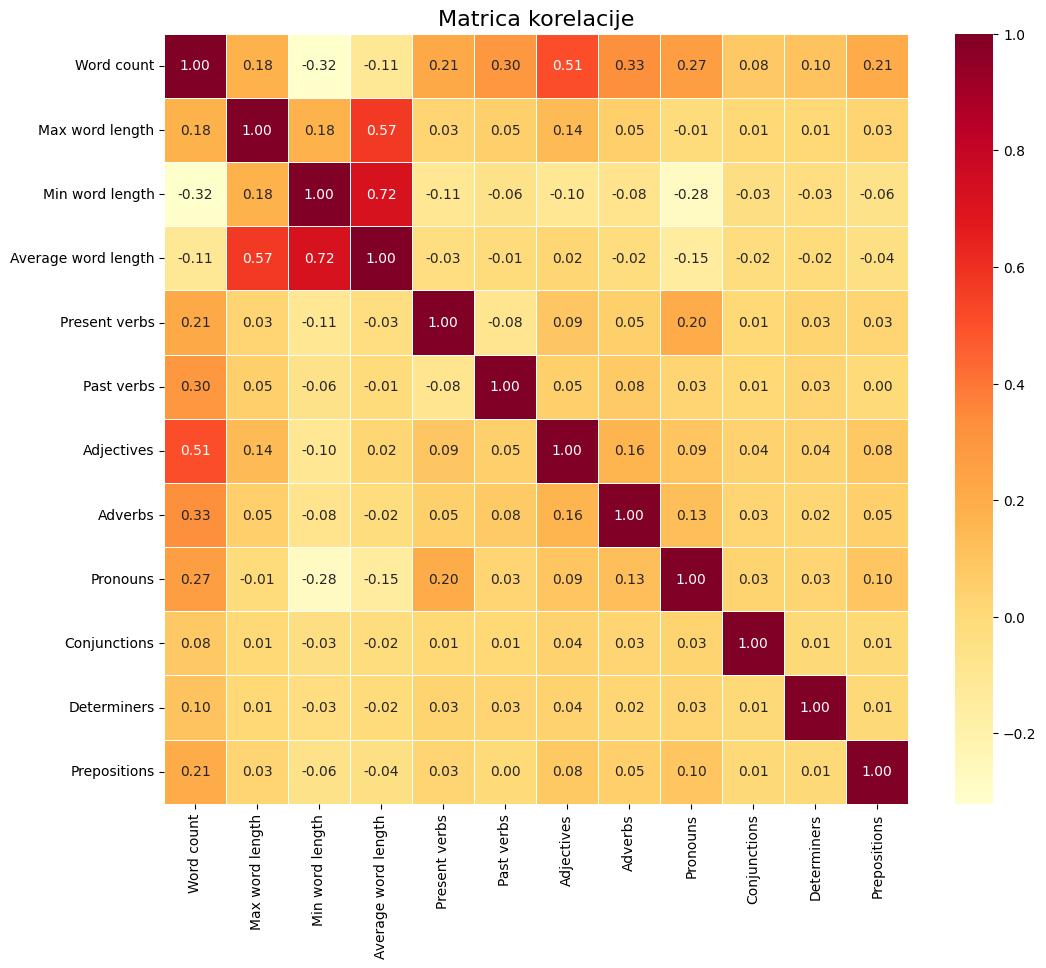

In [74]:
correlation_matrix = df[feature_cols4].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='YlOrRd', fmt=".2f", linewidths=.5)
plt.title('Matrica korelacije', fontsize=16)
plt.show()

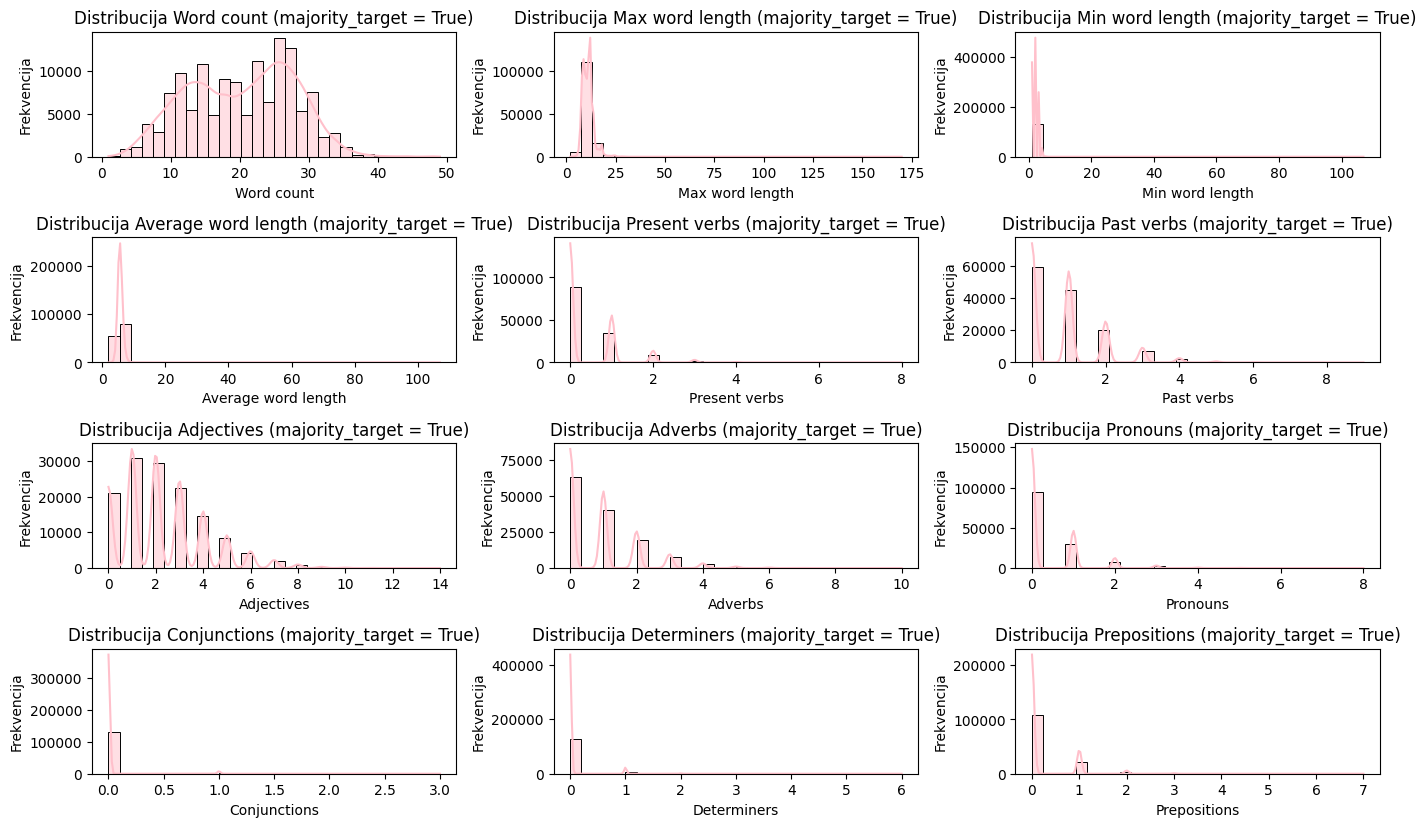

In [75]:
plt.figure(figsize=(14, 10))

for i, col in enumerate(feature_cols4, 1):
    plt.subplot(5, 3, i)
    sns.histplot(df[col], bins=30, kde=True, color='pink')
    plt.title(f"Distribucija {col} (majority_target = True)")
    plt.xlabel(col)
    plt.ylabel("Frekvencija")



plt.tight_layout()  
plt.show()

In [90]:

# Random Forest
rf = RandomForestClassifier()
rf.fit(x4_train, y4_train)
y4_pred = rf.predict(x4_test)


print("Accuracy:",metrics.accuracy_score(y4_test, y4_pred))
print("Precision:",metrics.precision_score(y4_test, y4_pred))
print("Recall:",metrics.recall_score(y4_test, y4_pred))
print("f1:", metrics.f1_score(y4_test,y4_pred))

print(classification_report(y4_test, y4_pred))

Accuracy: 0.5986437646708148
Precision: 0.6113805835082893
Recall: 0.6097913206729728
f1: 0.6105849179379654
              precision    recall  f1-score   support

         0.0       0.59      0.59      0.59     12990
         1.0       0.61      0.61      0.61     13849

    accuracy                           0.60     26839
   macro avg       0.60      0.60      0.60     26839
weighted avg       0.60      0.60      0.60     26839



In [76]:
# Decision Tree


clf = DecisionTreeClassifier()
clf = clf.fit(x4_train,y4_train)
y4_pred = clf.predict(x4_test)

print("Accuracy:",metrics.accuracy_score(y4_test, y4_pred))
print("Precision:",metrics.precision_score(y4_test, y4_pred))
print("Recall:",metrics.recall_score(y4_test, y4_pred))
print("F1:", metrics.f1_score(y4_test, y4_pred))

print(classification_report(y4_test, y4_pred))

Accuracy: 0.5654458064756511
Precision: 0.581786890152649
Recall: 0.5614123763448624
F1: 0.571418072244883
              precision    recall  f1-score   support

         0.0       0.55      0.57      0.56     12990
         1.0       0.58      0.56      0.57     13849

    accuracy                           0.57     26839
   macro avg       0.57      0.57      0.57     26839
weighted avg       0.57      0.57      0.57     26839



In [77]:
# KNN


knn = KNeighborsClassifier(n_neighbors=5)  

knn.fit(x4_train, y4_train)
y4_pred = knn.predict(x4_test)

print("Accuracy:",metrics.accuracy_score(y4_test, y4_pred))
print("Precision:",metrics.precision_score(y4_test, y4_pred))
print("Recall:",metrics.recall_score(y4_test, y4_pred))
print("F1:", metrics.f1_score(y4_test, y4_pred))

print(classification_report(y4_test, y4_pred))

Accuracy: 0.580424009836432
Precision: 0.5926934097421204
Recall: 0.5974438587623655
F1: 0.5950591535114531
              precision    recall  f1-score   support

         0.0       0.57      0.56      0.56     12990
         1.0       0.59      0.60      0.60     13849

    accuracy                           0.58     26839
   macro avg       0.58      0.58      0.58     26839
weighted avg       0.58      0.58      0.58     26839



In [78]:
# Logistic Regression

lr = LogisticRegression(max_iter=1000)  
lr.fit(x4_train, y4_train)

y4_pred = lr.predict(x4_test)

print("Accuracy:",metrics.accuracy_score(y4_test, y4_pred))
print("Precision:",metrics.precision_score(y4_test, y4_pred))
print("Recall:",metrics.recall_score(y4_test, y4_pred))
print("F1:", metrics.f1_score(y4_test, y4_pred))

print(classification_report(y4_test, y4_pred))

Accuracy: 0.5601549983233355
Precision: 0.564059170114078
Recall: 0.6497942089681565
F1: 0.6038989363486897
              precision    recall  f1-score   support

         0.0       0.55      0.46      0.51     12990
         1.0       0.56      0.65      0.60     13849

    accuracy                           0.56     26839
   macro avg       0.56      0.56      0.55     26839
weighted avg       0.56      0.56      0.56     26839



In [79]:
#Naive Bayes

nb = MultinomialNB()
nb.fit(x4_train, y4_train)

y4_pred = nb.predict(x4_test)

print("Accuracy:",metrics.accuracy_score(y4_test, y4_pred))
print("Precision:",metrics.precision_score(y4_test, y4_pred))
print("Recall:",metrics.recall_score(y4_test, y4_pred))
print("F1:", metrics.f1_score(y4_test, y4_pred))

print(classification_report(y4_test, y4_pred))


Accuracy: 0.5559819665412273
Precision: 0.561923076923077
Recall: 0.6329698895227093
F1: 0.5953343067676322
              precision    recall  f1-score   support

         0.0       0.55      0.47      0.51     12990
         1.0       0.56      0.63      0.60     13849

    accuracy                           0.56     26839
   macro avg       0.55      0.55      0.55     26839
weighted avg       0.56      0.56      0.55     26839



In [80]:
#XGBoost

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')  
xgb.fit(x4_train, y4_train)

y4_pred = xgb.predict(x4_test)

print("Accuracy:",metrics.accuracy_score(y4_test, y4_pred))
print("Precision:",metrics.precision_score(y4_test, y4_pred))
print("Recall:",metrics.recall_score(y4_test, y4_pred))
print("F1:", metrics.f1_score(y4_test, y4_pred))

print(classification_report(y4_test, y4_pred))

C:\Users\Sara\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\training.py:183: UserWarning: [19:39:25] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Accuracy: 0.6031893885763255
Precision: 0.6122692496665965
Recall: 0.6298649722001588
F1: 0.6209424829157175
              precision    recall  f1-score   support

         0.0       0.59      0.57      0.58     12990
         1.0       0.61      0.63      0.62     13849

    accuracy                           0.60     26839
   macro avg       0.60      0.60      0.60     26839
weighted avg       0.60      0.60      0.60     26839



# Bez lematizacije i manji Text Cleaning

In [16]:
df5 = pd.read_csv("df_NoLemTC.csv")

In [ ]:
feature_cols5 = [
    'Word count',
       'Max word length', 'Min word length', 'Average word length',
       'Present verbs', 'Past verbs', 'Adjectives', 'Adverbs', 'Pronouns',
       'Conjunctions', 'Determiners', 'Prepositions', 'Digits', 'Dots',
       'Exclamations', 'Questions', 'Ampersands'
]


In [18]:
x5 = df5[feature_cols5]
y5 = df5['BinaryNumTarget']

x5_train, x5_test, y5_train, y5_test = train_test_split(x5, y5, test_size=0.2, random_state=1) 

In [20]:

# Random Forest
rf = RandomForestClassifier()
rf.fit(x5_train, y5_train)
y5_pred = rf.predict(x5_test)


print("Accuracy:",metrics.accuracy_score(y5_test, y5_pred))
print("Precision:",metrics.precision_score(y5_test, y5_pred))
print("Recall:",metrics.recall_score(y5_test, y5_pred))
print("F1:", metrics.f1_score(y5_test, y5_pred))

print(classification_report(y5_test, y5_pred))

Accuracy: 0.6256333830104321
Precision: 0.6384475879579253
Recall: 0.6347637937252073
F1: 0.6366003616636529
              precision    recall  f1-score   support

         0.0       0.61      0.62      0.61     12975
         1.0       0.64      0.63      0.64     13865

    accuracy                           0.63     26840
   macro avg       0.63      0.63      0.63     26840
weighted avg       0.63      0.63      0.63     26840



In [81]:
# Decision Tree


clf = DecisionTreeClassifier()
clf = clf.fit(x5_train,y5_train)
y5_pred = clf.predict(x5_test)


print("Accuracy:",metrics.accuracy_score(y5_test, y5_pred))
print("Precision:",metrics.precision_score(y5_test, y5_pred))
print("Recall:",metrics.recall_score(y5_test, y5_pred))
print("F1:", metrics.f1_score(y5_test, y5_pred))

print(classification_report(y5_test, y5_pred))

Accuracy: 0.5791356184798808
Precision: 0.5949722735674676
Recall: 0.5803822574828705
F1: 0.5875867104782767
              precision    recall  f1-score   support

         0.0       0.56      0.58      0.57     12975
         1.0       0.59      0.58      0.59     13865

    accuracy                           0.58     26840
   macro avg       0.58      0.58      0.58     26840
weighted avg       0.58      0.58      0.58     26840



In [82]:
# KNN


knn = KNeighborsClassifier(n_neighbors=5)  

knn.fit(x5_train, y5_train)
y5_pred = knn.predict(x5_test)

print("Accuracy:",metrics.accuracy_score(y5_test, y5_pred))
print("Precision:",metrics.precision_score(y5_test, y5_pred))
print("Recall:",metrics.recall_score(y5_test, y5_pred))
print("F1:", metrics.f1_score(y5_test, y5_pred))

print(classification_report(y5_test, y5_pred))

Accuracy: 0.5856929955290611
Precision: 0.5979447655748233
Recall: 0.604327443202308
F1: 0.6011191620632756
              precision    recall  f1-score   support

         0.0       0.57      0.57      0.57     12975
         1.0       0.60      0.60      0.60     13865

    accuracy                           0.59     26840
   macro avg       0.59      0.59      0.59     26840
weighted avg       0.59      0.59      0.59     26840



In [83]:
# Logistic Regression

lr = LogisticRegression(max_iter=1000)  
lr.fit(x5_train, y5_train)

y5_pred = lr.predict(x5_test)

print("Accuracy:",metrics.accuracy_score(y5_test, y5_pred))
print("Precision:",metrics.precision_score(y5_test, y5_pred))
print("Recall:",metrics.recall_score(y5_test, y5_pred))
print("F1:", metrics.f1_score(y5_test, y5_pred))

print(classification_report(y5_test, y5_pred))

Accuracy: 0.578204172876304
Precision: 0.5806799441836864
Recall: 0.6602957086188244
F1: 0.6179339205561742
              precision    recall  f1-score   support

         0.0       0.57      0.49      0.53     12975
         1.0       0.58      0.66      0.62     13865

    accuracy                           0.58     26840
   macro avg       0.58      0.58      0.57     26840
weighted avg       0.58      0.58      0.58     26840



In [84]:
#Naive Bayes

nb = MultinomialNB()
nb.fit(x5_train, y5_train)

y5_pred = nb.predict(x5_test)

print("Accuracy:",metrics.accuracy_score(y5_test, y5_pred))
print("Precision:",metrics.precision_score(y5_test, y5_pred))
print("Recall:",metrics.recall_score(y5_test, y5_pred))
print("F1:", metrics.f1_score(y5_test, y5_pred))

print(classification_report(y5_test, y5_pred))


Accuracy: 0.5741058122205663
Precision: 0.5748830913118386
Recall: 0.6738550306527227
F1: 0.6204469236643756
              precision    recall  f1-score   support

         0.0       0.57      0.47      0.51     12975
         1.0       0.57      0.67      0.62     13865

    accuracy                           0.57     26840
   macro avg       0.57      0.57      0.57     26840
weighted avg       0.57      0.57      0.57     26840



In [85]:
#XGBoost

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')  
xgb.fit(x5_train, y5_train)

y5_pred = xgb.predict(x5_test)

print("Accuracy:",metrics.accuracy_score(y5_test, y5_pred))
print("Precision:",metrics.precision_score(y5_test, y5_pred))
print("Recall:",metrics.recall_score(y5_test, y5_pred))
print("F1:", metrics.f1_score(y5_test, y5_pred))

print(classification_report(y5_test, y5_pred))

C:\Users\Sara\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\training.py:183: UserWarning: [19:44:54] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Accuracy: 0.6200074515648286
Precision: 0.6300922640170333
Recall: 0.6403173458348359
F1: 0.6351636558755143
              precision    recall  f1-score   support

         0.0       0.61      0.60      0.60     12975
         1.0       0.63      0.64      0.64     13865

    accuracy                           0.62     26840
   macro avg       0.62      0.62      0.62     26840
weighted avg       0.62      0.62      0.62     26840



In [ ]:
# SVM

svm_clf = SVC(kernel='linear')  
svm_clf.fit(x5_train, y5_train)  

y5_pred = svm_clf.predict(x5_test)

print("Accuracy:", accuracy_score(y5_test, y5_pred))
print("Precision:", metrics.precision_score(y5_test, y5_pred))
print("Recall:", metrics.recall_score(y5_test, y5_pred))
print("F1:", metrics.f1_score(y5_test, y5_pred))

print(classification_report(y5_test, y5_pred))


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['tweet_new'])  
y = df['BinaryNumTarget'].astype(int)  # Osiguraj da su vrednosti 0 i 1

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "Decision Tree": DecisionTreeClassifier(),
    "Naive Bayes": MultinomialNB()
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = metrics.precision_score(y_test, y_pred)
    rec = metrics.recall_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred)

    results[name] = (acc, prec, rec, f1)
    print(f"{name}: Accuracy={acc:.4f}, Precision={prec:.4f}, Recall={rec:.4f}, F1={f1:.4f}")


Random Forest: Accuracy=0.9370, Precision=0.9414, Recall=0.9359, F1=0.9386
Decision Tree: Accuracy=0.8972, Precision=0.8980, Recall=0.9030, F1=0.9005
Naive Bayes: Accuracy=0.9033, Precision=0.8986, Recall=0.9156, F1=0.9071


# Preprocesiranje kao u literaturi

In [96]:
df6 = pd.read_csv("df_Literatura.csv")

In [98]:
feature_cols6 = [
    'Word count',
       'Max word length', 'Min word length', 'Average word length',
       'Present verbs', 'Past verbs', 'Adjectives', 'Adverbs', 'Pronouns',
       'Conjunctions', 'Determiners', 'Prepositions'
]


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df6['tweet_new'])  
y = df6['BinaryNumTarget'].astype(int)  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "Decision Tree": DecisionTreeClassifier(),
    "Naive Bayes": MultinomialNB()
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = metrics.precision_score(y_test, y_pred)
    rec = metrics.recall_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred)

    results[name] = (acc, prec, rec, f1)
    print(f"{name}: Accuracy={acc:.4f}, Precision={prec:.4f}, Recall={rec:.4f}, F1={f1:.4f}")


Random Forest: Accuracy=0.9797, Precision=0.9826, Recall=0.9779, F1=0.9802
Decision Tree: Accuracy=0.9692, Precision=0.9685, Recall=0.9716, F1=0.9701
Naive Bayes: Accuracy=0.9430, Precision=0.9341, Recall=0.9563, F1=0.9451


In [99]:
x6 = df6[feature_cols6]
y6 = df6['BinaryNumTarget']

x6_train, x6_test, y6_train, y6_test = train_test_split(x6, y6, test_size=0.2, random_state=1) 

In [100]:

# Random Forest
rf = RandomForestClassifier()
rf.fit(x6_train, y6_train)
y6_pred = rf.predict(x6_test)


print("Accuracy:",metrics.accuracy_score(y6_test, y6_pred))
print("Precision:",metrics.precision_score(y6_test, y6_pred))
print("Recall:",metrics.recall_score(y6_test, y6_pred))
print("F1:", metrics.f1_score(y6_test, y6_pred))

print(classification_report(y6_test, y6_pred))

Accuracy: 0.6032266477886657
Precision: 0.6141552511415526
Recall: 0.6215611235468265
F1: 0.617835994975776
              precision    recall  f1-score   support

         0.0       0.59      0.58      0.59     12990
         1.0       0.61      0.62      0.62     13849

    accuracy                           0.60     26839
   macro avg       0.60      0.60      0.60     26839
weighted avg       0.60      0.60      0.60     26839



In [101]:
# Decision Tree


clf = DecisionTreeClassifier()
clf = clf.fit(x6_train,y6_train)
y6_pred = clf.predict(x6_test)

print("Accuracy:",metrics.accuracy_score(y6_test, y6_pred))
print("Precision:",metrics.precision_score(y6_test, y6_pred))
print("Recall:",metrics.recall_score(y6_test, y6_pred))
print("F1:", metrics.f1_score(y6_test, y6_pred))

print(classification_report(y6_test, y6_pred))

Accuracy: 0.5755057938075189
Precision: 0.5909764409542154
Recall: 0.5759982670228897
F1: 0.5833912312136614
              precision    recall  f1-score   support

         0.0       0.56      0.57      0.57     12990
         1.0       0.59      0.58      0.58     13849

    accuracy                           0.58     26839
   macro avg       0.58      0.58      0.58     26839
weighted avg       0.58      0.58      0.58     26839



In [102]:
# KNN


knn = KNeighborsClassifier(n_neighbors=5)  

knn.fit(x6_train, y6_train)
y6_pred = knn.predict(x6_test)

print("Accuracy:",metrics.accuracy_score(y6_test, y6_pred))
print("Precision:",metrics.precision_score(y6_test, y6_pred))
print("Recall:",metrics.recall_score(y6_test, y6_pred))
print("F1:", metrics.f1_score(y6_test, y6_pred))

print(classification_report(y6_test, y6_pred))

Accuracy: 0.5790081597675025
Precision: 0.5912931404840327
Recall: 0.5962885406888584
F1: 0.5937803343519683
              precision    recall  f1-score   support

         0.0       0.57      0.56      0.56     12990
         1.0       0.59      0.60      0.59     13849

    accuracy                           0.58     26839
   macro avg       0.58      0.58      0.58     26839
weighted avg       0.58      0.58      0.58     26839



In [105]:
# Logistic Regression

lr = LogisticRegression(max_iter=1000)  
lr.fit(x6_train, y6_train)

y6_pred = lr.predict(x6_test)

print("Accuracy:",metrics.accuracy_score(y6_test, y6_pred))
print("Precision:",metrics.precision_score(y6_test, y6_pred))
print("Recall:",metrics.recall_score(y6_test, y6_pred))
print("F1:", metrics.f1_score(y6_test, y6_pred))

print(classification_report(y6_test, y6_pred))

Accuracy: 0.5645888445918253
Precision: 0.567699530516432
Recall: 0.6548487255397502
F1: 0.6081679184549357
              precision    recall  f1-score   support

         0.0       0.56      0.47      0.51     12990
         1.0       0.57      0.65      0.61     13849

    accuracy                           0.56     26839
   macro avg       0.56      0.56      0.56     26839
weighted avg       0.56      0.56      0.56     26839



In [106]:
#Naive Bayes

nb = MultinomialNB()
nb.fit(x6_train, y6_train)

y6_pred = nb.predict(x6_test)

print("Accuracy:",metrics.accuracy_score(y6_test, y6_pred))
print("Precision:",metrics.precision_score(y6_test, y6_pred))
print("Recall:",metrics.recall_score(y6_test, y6_pred))
print("F1:", metrics.f1_score(y6_test, y6_pred))

print(classification_report(y6_test, y6_pred))


Accuracy: 0.5596706285629122
Precision: 0.5659201557935735
Recall: 0.6295039353021878
F1: 0.596021056949477
              precision    recall  f1-score   support

         0.0       0.55      0.49      0.52     12990
         1.0       0.57      0.63      0.60     13849

    accuracy                           0.56     26839
   macro avg       0.56      0.56      0.56     26839
weighted avg       0.56      0.56      0.56     26839



In [107]:
#XGBoost

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')  
xgb.fit(x6_train, y6_train)

y6_pred = xgb.predict(x6_test)

print("Accuracy:",metrics.accuracy_score(y6_test, y6_pred))
print("Precision:",metrics.precision_score(y6_test, y6_pred))
print("Recall:",metrics.recall_score(y6_test, y6_pred))
print("F1:", metrics.f1_score(y6_test, y6_pred))

print(classification_report(y6_test, y6_pred))

C:\Users\Sara\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\training.py:183: UserWarning: [22:04:49] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Accuracy: 0.602965833302284
Precision: 0.6120115063495405
Recall: 0.6298649722001588
F1: 0.6208099067682016
              precision    recall  f1-score   support

         0.0       0.59      0.57      0.58     12990
         1.0       0.61      0.63      0.62     13849

    accuracy                           0.60     26839
   macro avg       0.60      0.60      0.60     26839
weighted avg       0.60      0.60      0.60     26839



# Smanjen Stop Word

In [2]:
df7 = pd.read_csv("df_manjiSW.csv")

In [3]:
feature_cols7 = [
    'Word count',
       'Max word length', 'Min word length', 'Average word length',
       'Present verbs', 'Past verbs', 'Adjectives', 'Adverbs', 'Pronouns',
       'Conjunctions', 'Determiners', 'Prepositions', 'Digits'
]


In [4]:
x7 = df7[feature_cols7]
y7 = df7['BinaryNumTarget']

x7_train, x7_test, y7_train, y7_test = train_test_split(x7, y7, test_size=0.2, random_state=1) 

In [5]:

# Random Forest
rf = RandomForestClassifier()
rf.fit(x7_train, y7_train)
y7_pred = rf.predict(x7_test)


print("Accuracy:",metrics.accuracy_score(y7_test, y7_pred))
print("Precision:",metrics.precision_score(y7_test, y7_pred))
print("Recall:",metrics.recall_score(y7_test, y7_pred))
print("F1:", metrics.f1_score(y7_test, y7_pred))

print(classification_report(y7_test, y7_pred))

Accuracy: 0.6520491803278688
Precision: 0.6687401633815484
Recall: 0.6446322785724606
F1: 0.6564649622953835
              precision    recall  f1-score   support

         0.0       0.64      0.66      0.65     12998
         1.0       0.67      0.64      0.66     13842

    accuracy                           0.65     26840
   macro avg       0.65      0.65      0.65     26840
weighted avg       0.65      0.65      0.65     26840



In [ ]:
df7['Word count'].max()

55.0

: 

In [119]:
# Decision Tree


clf = DecisionTreeClassifier()
clf = clf.fit(x7_train,y7_train)
y7_pred = clf.predict(x7_test)

print("Accuracy:",metrics.accuracy_score(y7_test, y7_pred))
print("Precision:",metrics.precision_score(y7_test, y7_pred))
print("Recall:",metrics.recall_score(y7_test, y7_pred))
print("F1:", metrics.f1_score(y7_test, y7_pred))

print(classification_report(y7_test, y7_pred))

Accuracy: 0.5954918032786886
Precision: 0.6092526169387307
Recall: 0.601285941337957
F1: 0.6052430643929753
              precision    recall  f1-score   support

         0.0       0.58      0.59      0.59     12998
         1.0       0.61      0.60      0.61     13842

    accuracy                           0.60     26840
   macro avg       0.60      0.60      0.60     26840
weighted avg       0.60      0.60      0.60     26840



In [120]:
#XGBoost

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')  
xgb.fit(x7_train, y7_train)

y7_pred = xgb.predict(x7_test)

print("Accuracy:",metrics.accuracy_score(y7_test, y7_pred))
print("Precision:",metrics.precision_score(y7_test, y7_pred))
print("Recall:",metrics.recall_score(y7_test, y7_pred))
print("F1:", metrics.f1_score(y7_test, y7_pred))

print(classification_report(y7_test, y7_pred))

C:\Users\Sara\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\training.py:183: UserWarning: [11:55:15] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Accuracy: 0.6417660208643815
Precision: 0.6567296996662959
Recall: 0.6397919375812744
F1: 0.6481501811395324
              precision    recall  f1-score   support

         0.0       0.63      0.64      0.64     12998
         1.0       0.66      0.64      0.65     13842

    accuracy                           0.64     26840
   macro avg       0.64      0.64      0.64     26840
weighted avg       0.64      0.64      0.64     26840



In [121]:
#Naive Bayes

nb = MultinomialNB()
nb.fit(x7_train, y7_train)

y7_pred = nb.predict(x7_test)

print("Accuracy:",metrics.accuracy_score(y7_test, y7_pred))
print("Precision:",metrics.precision_score(y7_test, y7_pred))
print("Recall:",metrics.recall_score(y7_test, y7_pred))
print("F1:", metrics.f1_score(y7_test, y7_pred))

print(classification_report(y7_test, y7_pred))


Accuracy: 0.597913561847988
Precision: 0.6036005434782609
Recall: 0.6418870105476088
F1: 0.6221553112527134
              precision    recall  f1-score   support

         0.0       0.59      0.55      0.57     12998
         1.0       0.60      0.64      0.62     13842

    accuracy                           0.60     26840
   macro avg       0.60      0.60      0.60     26840
weighted avg       0.60      0.60      0.60     26840



In [122]:
# Logistic Regression

lr = LogisticRegression(max_iter=1000)  
lr.fit(x7_train, y7_train)

y7_pred = lr.predict(x7_test)


print("Accuracy:",metrics.accuracy_score(y7_test, y7_pred))
print("Precision:",metrics.precision_score(y7_test, y7_pred))
print("Recall:",metrics.recall_score(y7_test, y7_pred))
print("F1:", metrics.f1_score(y7_test, y7_pred))

print(classification_report(y7_test, y7_pred))

Accuracy: 0.5975409836065574
Precision: 0.600144946633285
Recall: 0.6580696431151568
F1: 0.6277739490006892
              precision    recall  f1-score   support

         0.0       0.59      0.53      0.56     12998
         1.0       0.60      0.66      0.63     13842

    accuracy                           0.60     26840
   macro avg       0.60      0.60      0.59     26840
weighted avg       0.60      0.60      0.60     26840



In [123]:
# KNN


knn = KNeighborsClassifier(n_neighbors=5)  

knn.fit(x7_train, y7_train)
y7_pred = knn.predict(x7_test)

print("Accuracy:",metrics.accuracy_score(y7_test, y7_pred))
print("Precision:",metrics.precision_score(y7_test, y7_pred))
print("Recall:",metrics.recall_score(y7_test, y7_pred))
print("F1:", metrics.f1_score(y7_test, y7_pred))

print(classification_report(y7_test, y7_pred))

Accuracy: 0.6156855439642325
Precision: 0.6304846466888642
Recall: 0.6155902326253432
F1: 0.6229484227071682
              precision    recall  f1-score   support

         0.0       0.60      0.62      0.61     12998
         1.0       0.63      0.62      0.62     13842

    accuracy                           0.62     26840
   macro avg       0.62      0.62      0.62     26840
weighted avg       0.62      0.62      0.62     26840



In [124]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df7['tweet_new'])  
y = df7['BinaryNumTarget'].astype(int)  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "Decision Tree": DecisionTreeClassifier(),
    "Naive Bayes": MultinomialNB()
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = metrics.precision_score(y_test, y_pred)
    rec = metrics.recall_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred)

    results[name] = (acc, prec, rec, f1)
    print(f"{name}: Accuracy={acc:.4f}, Precision={prec:.4f}, Recall={rec:.4f}, F1={f1:.4f}")


Random Forest: Accuracy=0.9773, Precision=0.9784, Recall=0.9773, F1=0.9778
Decision Tree: Accuracy=0.9684, Precision=0.9670, Recall=0.9714, F1=0.9692
Naive Bayes: Accuracy=0.9445, Precision=0.9377, Recall=0.9552, F1=0.9464


# Bez Stop Word

In [125]:
df8 = pd.read_csv("df_bezSW.csv")

feature_cols8 = [
    'Word count',
       'Max word length', 'Min word length', 'Average word length',
       'Present verbs', 'Past verbs', 'Adjectives', 'Adverbs', 'Pronouns',
       'Conjunctions', 'Determiners', 'Prepositions', 'Digits'
]

x8 = df8[feature_cols8]
y8 = df8['BinaryNumTarget']

x8_train, x8_test, y8_train, y8_test = train_test_split(x8, y8, test_size=0.2, random_state=1) 


In [126]:

# Random Forest
rf = RandomForestClassifier()
rf.fit(x8_train, y8_train)
y8_pred = rf.predict(x8_test)


print("Accuracy:",metrics.accuracy_score(y8_test, y8_pred))
print("Precision:",metrics.precision_score(y8_test, y8_pred))
print("Recall:",metrics.recall_score(y8_test, y8_pred))
print("F1:", metrics.f1_score(y8_test, y8_pred))

print(classification_report(y8_test, y8_pred))

Accuracy: 0.6586810730253353
Precision: 0.6731523266997115
Recall: 0.6573472041612484
F1: 0.6651558902006652
              precision    recall  f1-score   support

         0.0       0.64      0.66      0.65     12998
         1.0       0.67      0.66      0.67     13842

    accuracy                           0.66     26840
   macro avg       0.66      0.66      0.66     26840
weighted avg       0.66      0.66      0.66     26840



In [127]:
# Decision Tree


clf = DecisionTreeClassifier()
clf = clf.fit(x8_train,y8_train)
y8_pred = clf.predict(x8_test)


print("Accuracy:",metrics.accuracy_score(y8_test, y8_pred))
print("Precision:",metrics.precision_score(y8_test, y8_pred))
print("Recall:",metrics.recall_score(y8_test, y8_pred))
print("F1:", metrics.f1_score(y8_test, y8_pred))

print(classification_report(y8_test, y8_pred))

Accuracy: 0.5997764530551416
Precision: 0.6129737609329446
Recall: 0.60757116023696
F1: 0.6102605035919019
              precision    recall  f1-score   support

         0.0       0.59      0.59      0.59     12998
         1.0       0.61      0.61      0.61     13842

    accuracy                           0.60     26840
   macro avg       0.60      0.60      0.60     26840
weighted avg       0.60      0.60      0.60     26840



In [128]:
#XGBoost

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')  
xgb.fit(x8_train, y8_train)

y8_pred = xgb.predict(x8_test)

print("Accuracy:",metrics.accuracy_score(y8_test, y8_pred))
print("Precision:",metrics.precision_score(y8_test, y8_pred))
print("Recall:",metrics.recall_score(y8_test, y8_pred))
print("F1:", metrics.f1_score(y8_test, y8_pred))

print(classification_report(y8_test, y8_pred))

C:\Users\Sara\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\training.py:183: UserWarning: [12:42:48] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Accuracy: 0.6444113263785395
Precision: 0.6595160332541568
Recall: 0.6418870105476088
F1: 0.6505821190598228
              precision    recall  f1-score   support

         0.0       0.63      0.65      0.64     12998
         1.0       0.66      0.64      0.65     13842

    accuracy                           0.64     26840
   macro avg       0.64      0.64      0.64     26840
weighted avg       0.64      0.64      0.64     26840



In [129]:
#Naive Bayes

nb = MultinomialNB()
nb.fit(x8_train, y8_train)

y8_pred = nb.predict(x8_test)
print("Accuracy:",metrics.accuracy_score(y8_test, y8_pred))
print("Precision:",metrics.precision_score(y8_test, y8_pred))
print("Recall:",metrics.recall_score(y8_test, y8_pred))
print("F1:", metrics.f1_score(y8_test, y8_pred))

print(classification_report(y8_test, y8_pred))

Accuracy: 0.5937779433681073
Precision: 0.6007956649975993
Recall: 0.6327842797283629
F1: 0.6163752155096583
              precision    recall  f1-score   support

         0.0       0.59      0.55      0.57     12998
         1.0       0.60      0.63      0.62     13842

    accuracy                           0.59     26840
   macro avg       0.59      0.59      0.59     26840
weighted avg       0.59      0.59      0.59     26840



In [130]:
# Logistic Regression

lr = LogisticRegression(max_iter=1000)  
lr.fit(x8_train, y8_train)

y8_pred = lr.predict(x8_test)



print("Accuracy:",metrics.accuracy_score(y8_test, y8_pred))
print("Precision:",metrics.precision_score(y8_test, y8_pred))
print("Recall:",metrics.recall_score(y8_test, y8_pred))
print("F1:", metrics.f1_score(y8_test, y8_pred))

print(classification_report(y8_test, y8_pred))

Accuracy: 0.596274217585693
Precision: 0.5995759904597854
Recall: 0.6538072532870972
F1: 0.6255183854022671
              precision    recall  f1-score   support

         0.0       0.59      0.54      0.56     12998
         1.0       0.60      0.65      0.63     13842

    accuracy                           0.60     26840
   macro avg       0.60      0.59      0.59     26840
weighted avg       0.60      0.60      0.59     26840



In [131]:
# KNN


knn = KNeighborsClassifier(n_neighbors=5)  

knn.fit(x8_train, y8_train)
y8_pred = knn.predict(x8_test)

print("Accuracy:",metrics.accuracy_score(y8_test, y8_pred))
print("Precision:",metrics.precision_score(y8_test, y8_pred))
print("Recall:",metrics.recall_score(y8_test, y8_pred))
print("F1:", metrics.f1_score(y8_test, y8_pred))

print(classification_report(y8_test, y8_pred))

Accuracy: 0.6164679582712369
Precision: 0.6295836376917457
Recall: 0.6226701343736454
F1: 0.6261078018305971
              precision    recall  f1-score   support

         0.0       0.60      0.61      0.61     12998
         1.0       0.63      0.62      0.63     13842

    accuracy                           0.62     26840
   macro avg       0.62      0.62      0.62     26840
weighted avg       0.62      0.62      0.62     26840



In [132]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df8['tweet_new'])  
y = df8['BinaryNumTarget'].astype(int)  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "Decision Tree": DecisionTreeClassifier(),
    "Naive Bayes": MultinomialNB()
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = metrics.precision_score(y_test, y_pred)
    rec = metrics.recall_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred)

    results[name] = (acc, prec, rec, f1)
    print(f"{name}: Accuracy={acc:.4f}, Precision={prec:.4f}, Recall={rec:.4f}, F1={f1:.4f}")


Random Forest: Accuracy=0.9753, Precision=0.9751, Recall=0.9768, F1=0.9759
Decision Tree: Accuracy=0.9684, Precision=0.9693, Recall=0.9691, F1=0.9692
Naive Bayes: Accuracy=0.9444, Precision=0.9378, Recall=0.9549, F1=0.9463
